In [400]:
import sympy as sy
from sympy.vector import CoordSys3D
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
N = CoordSys3D('N')
i=N.i
j=N.j
k=N.k

def norm(BC):
    return sy.sqrt(BC.dot(BC))
def unit(BC):
    return BC/norm(BC)
def projectNorm(v1,v2):
    #projeta v1 em v2
    return v1.dot(unit(v2))
def vector(a,b,c):
    return a*i+b*j+c*k
def subValues(exp,symbolVector,valuesVector):
    for i in range(len(symbolVector)):
        exp=exp.subs(symbolVector[i],valuesVector[i])
    return exp
def angle(v1,v2):
    cos=unit(v1).dot(unit(v2))
    ang=sy.acos(cos)
    return ang #RADIANS!
def solveForces(Forcas,aplicacao,icognitas,debugON=False):
    n=len(Forcas)
    vetorAplicacao=[]
    for f in range(n):
        vetorAplicacao.append(vector(*aplicacao[f]))

    #Somatorio das forcas
    dir=[i,j,k]
    somaF=[0,0,0]
    for f in range(n):
        for d in range(3):
            somaF[d]+=Forcas[f].dot(dir[d])
    #Somatorio dos momentos
    somaM=[0,0,0]
    for f in range(n):
        for d in range(3):
            somaM[d]+=(vetorAplicacao[f].cross(Forcas[f])).dot(dir[d])
    #Resolver equacoes
    equacoes=somaF+somaM
    equacoes = [i for i in equacoes if i != 0] #eliminar zeros
    result=sy.solve(equacoes,*icognitas)
    print(result)
    res=[]

    if(debugON):
        print('Forcas')
        print(Forcas)
        print('Equacoes')
        print(equacoes)
    for icog in range(len(icognitas)):
        res.append(result[icognitas[icog]])

        
    return res
    
def resposta(r,unidade):
    if(unidade==r'^{\circ}'):
        r=np.rad2deg(float(r))
    try:
        value=sy.symbols('{0:.3f}'.format(r)+unidade)
    except:
        #print("symbolic")
        value=r
    display(pd.DataFrame([cell_vars()]).round(2).transpose())
    print('A resposta final é:')
    display(value)

def cell_vars(offset=0):
    import io
    from contextlib import redirect_stdout

    ipy = get_ipython()
    out = io.StringIO()

    with redirect_stdout(out):
        ipy.magic("history {0}".format(ipy.execution_count - offset))

    #process each line...
    x = out.getvalue().replace(" ", "").split("\n")
    print(x)
    x = [a.split("=")[0] for a in x if "=" in a] #all of the variables in the cell
    g = globals()
    result = {k:g[k] for k in x if k in g}
    return result

from IPython.display import Image
from IPython.display import display, Math, Latex
from IPython.core.magic import register_cell_magic


@register_cell_magic
def write_and_run(line, cell):
    argz = line.split()
    file = argz[-1]
    mode = 'w'
    if len(argz) == 2 and argz[0] == '-a':
        mode = 'a'
    with open(file, mode) as f:
        f.write(cell)
    get_ipython().run_cell(cell)

<IPython.core.display.Math object>

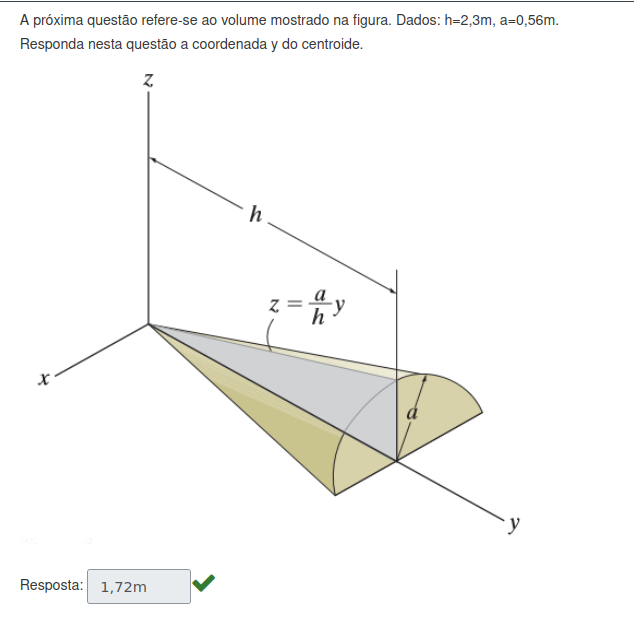

In [401]:
questao='1.1'
display(Math(r'\Large{'+questao+')}'))
Image(filename='../data/Q7/images/'+questao+'.png') 

In [402]:
%%write_and_run ../data/Q7/inputs/{questao}.py
h=2.3
a=0.56


#referencia
F=700
w=150
MC=800
a=8
b=4
c=6


In [403]:
%%write_and_run ../data/Q7/resolutions/{questao}.py
ycm=3/4*h 
zcm=a/np.pi
resposta(ycm,'m')

['%%write_and_run../data/Q7/resolutions/{questao}.py', 'ycm=3/4*h', 'zcm=a/np.pi', "resposta(ycm,'m')", '']


/tmp/ipykernel_24261/1152134400.py:83: DeprecationWarning: `magic(...)` is deprecated since IPython 0.13 (warning added in 8.1), use run_line_magic(magic_name, parameter_s).
  ipy.magic("history {0}".format(ipy.execution_count - offset))


,0
ycm,1.72
zcm,0.18


A resposta final é:


1.725m

In [404]:
#cylindrical coordinates
r,y,theta=sy.symbols(r'r y \theta')
V=sy.integrate(sy.integrate(sy.integrate(r,(r,0,y)),(theta,0,sy.pi)),(y,0,1))
ycm=sy.integrate(sy.integrate(sy.integrate(y*r,(r,0,y)),(theta,0,sy.pi)),(y,0,1))/V
rcm=sy.integrate(sy.integrate(sy.integrate(r*r,(r,0,y)),(theta,0,sy.pi)),(y,0,1))/V #zcm diferente de rcm!!!!!!
print(ycm)
print(rcm)

3/4
1/2


In [405]:
#cartesian coordinates
x = sy.symbols("x", real=True)
y = sy.symbols("y", real=True, positive=True)
z=sy.sqrt(y**2-x**2)
V=(sy.integrate(sy.integrate(z,(x,-y,y)),(y,0,1)))
ycm=(sy.integrate(sy.integrate(z*y,(x,-y,y)),(y,0,1)))/V
zcm=(sy.integrate(sy.integrate(z**2/2,(x,-y,y)),(y,0,1)))/V #zcm diferente de rcm!!!!!!
print(ycm)
print(zcm)

3/4
1/pi


In [406]:
#cartesian coordinates
x = sy.symbols("x", real=True)
y = sy.symbols("y", real=True, positive=True)
a = sy.symbols("a", real=True,positive=True)
h = sy.symbols("h", real=True, positive=True)
z=sy.sqrt((a/h*y)**2-x**2)
V=(sy.integrate(sy.integrate(z,(x,-y*a/h,y*a/h)),(y,0,h)))
ycm=(sy.integrate(sy.integrate(z*y,(x,-y*a/h,y*a/h)),(y,0,h)))/V
zcm=(sy.integrate(sy.integrate(z**2/2,(x,-y*a/h,y*a/h)),(y,0,h)))/V #zcm diferente de rcm!!!!!!
print(ycm)
print(zcm)

3*h/4
a/pi


<IPython.core.display.Math object>

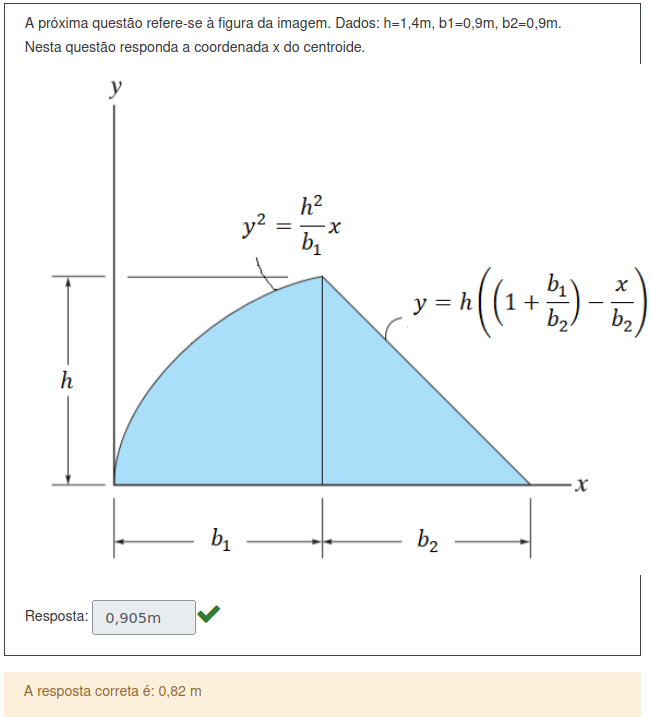

In [407]:
questao='1.2'
display(Math(r'\Large{'+questao+')}'))
Image(filename='../data/Q7/images/'+questao+'.png') 

In [408]:
%%write_and_run ../data/Q7/inputs/{questao}.py
h=1.4 
b1=0.9 
b2=0.9


#referencia
b1=1
b2=1
h=1


In [409]:
%%write_and_run ../data/Q7/resolutions/{questao}.py
#b1,b2,h,x,y=sy.symbols('b1 b2 h x y')
y=sy.symbols('y')
x1=b1*y**2/h**2
x2=(-y/h+(1+b1/b2))*b2
V=sy.integrate((x2-x1),(y,0,h))
ycminf=y
xcminf=(x2+x1)/2
ycm=sy.integrate(ycminf*(x2-x1),(y,0,h))/V
xcm=sy.integrate(xcminf*(x2-x1),(y,0,h))/V
resposta(xcm,'m')


['%%write_and_run../data/Q7/resolutions/{questao}.py', "#b1,b2,h,x,y=sy.symbols('b1b2hxy')", "y=sy.symbols('y')", 'x1=b1*y**2/h**2', 'x2=(-y/h+(1+b1/b2))*b2', 'V=sy.integrate((x2-x1),(y,0,h))', 'ycminf=y', 'xcminf=(x2+x1)/2', 'ycm=sy.integrate(ycminf*(x2-x1),(y,0,h))/V', 'xcm=sy.integrate(xcminf*(x2-x1),(y,0,h))/V', "resposta(xcm,'m')", '']


/tmp/ipykernel_24261/1152134400.py:83: DeprecationWarning: `magic(...)` is deprecated since IPython 0.13 (warning added in 8.1), use run_line_magic(magic_name, parameter_s).
  ipy.magic("history {0}".format(ipy.execution_count - offset))


,0
y,y
x1,0.459183673469388*y**2
x2,1.8 - 0.642857142857143*y
V,1.47000000000000
ycminf,y
xcminf,0.229591836734694*y**2 - 0.321428571428571*y +...
ycm,0.500000000000000
xcm,0.822857142857143


A resposta final é:


0.823m

<IPython.core.display.Math object>

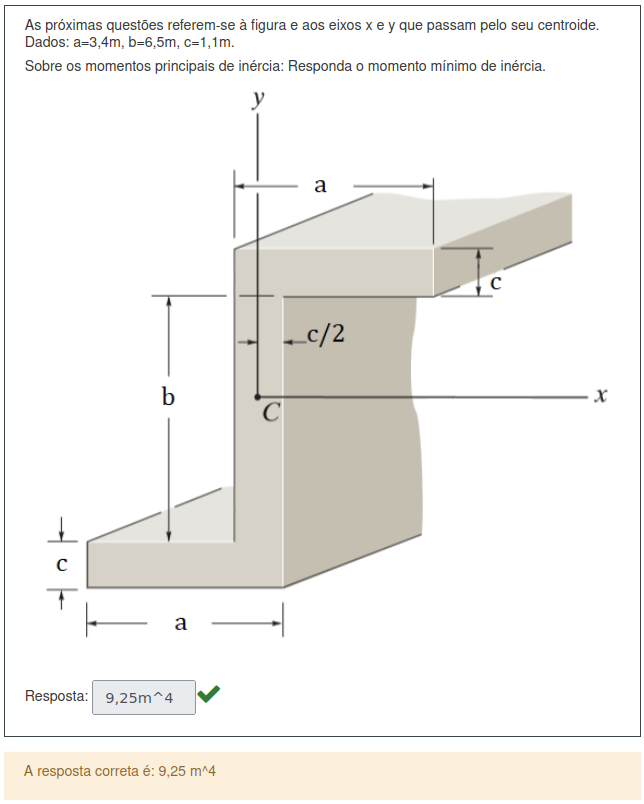

In [410]:
questao='1.3'
display(Math(r'\Large{'+questao+')}'))
Image(filename='../data/Q7/images/'+questao+'.png') 

In [411]:
%%write_and_run ../data/Q7/inputs/{questao}.py
a=3.4 
b=6.5 
c=1.1



#referencia
a=4
b=5
c=1



#referencia 2
a=400
b=400
c=100

In [412]:
%%write_and_run ../data/Q7/resolutions/{questao}.py

l1=a-c
h1=c
A1=l1*h1 
dx1=a/2
dy1=b/2+c/2
IAxy1=A1*dx1*dy1
Ibxy1=0
Ibx1=l1*h1**3/12
Iby1=l1**3*h1/12
IAx1=A1*dy1**2
IAy1=A1*dx1**2
Ix1=IAx1+Ibx1
Iy1=IAy1+Iby1
Ixy1=IAxy1+Ibxy1

l2=c
h2=b+2*c
A2=l2*h2
dx2=0
dy2=0 
IAxy2=0
Ibxy2=0
IAx2=A2*dy2**2
IAy2=A2*dx2**2
Ibx2=l2*h2**3/12
Iby2=l2**3*h2/12
Ix2=IAx2+Ibx2
Iy2=IAy2+Iby2
Ixy2=IAxy2+Ibxy2

l3=a-c
h3=c
A3=l3*h3
dx3=-a/2
dy3=-b/2-c/2
IAxy3=A3*dx3*dy3
Ibxy3=0
Ibx3=l3*h3**3/12
Iby3=l3**3*h3/12
IAx3=A3*dy3**2
IAy3=A3*dx3**2
Ix3=IAx3+Ibx3
Iy3=IAy3+Iby3
Ixy3=IAxy3+Ibxy3

Ix=Ix1+Ix2+Ix3 
Iy=Iy1+Iy2+Iy3 
Ixy=Ixy1+Ixy2+Ixy3

IxyMax=(Ix+Iy)/2+(((Ix-Iy)/2)**2+Ixy**2)**0.5
IxyMin=(Ix+Iy)/2-(((Ix-Iy)/2)**2+Ixy**2)**0.5
resposta(IxyMin,'m^4') 


['%%write_and_run../data/Q7/resolutions/{questao}.py', '', 'l1=a-c', 'h1=c', 'A1=l1*h1', 'dx1=a/2', 'dy1=b/2+c/2', 'IAxy1=A1*dx1*dy1', 'Ibxy1=0', 'Ibx1=l1*h1**3/12', 'Iby1=l1**3*h1/12', 'IAx1=A1*dy1**2', 'IAy1=A1*dx1**2', 'Ix1=IAx1+Ibx1', 'Iy1=IAy1+Iby1', 'Ixy1=IAxy1+Ibxy1', '', 'l2=c', 'h2=b+2*c', 'A2=l2*h2', 'dx2=0', 'dy2=0', 'IAxy2=0', 'Ibxy2=0', 'IAx2=A2*dy2**2', 'IAy2=A2*dx2**2', 'Ibx2=l2*h2**3/12', 'Iby2=l2**3*h2/12', 'Ix2=IAx2+Ibx2', 'Iy2=IAy2+Iby2', 'Ixy2=IAxy2+Ibxy2', '', 'l3=a-c', 'h3=c', 'A3=l3*h3', 'dx3=-a/2', 'dy3=-b/2-c/2', 'IAxy3=A3*dx3*dy3', 'Ibxy3=0', 'Ibx3=l3*h3**3/12', 'Iby3=l3**3*h3/12', 'IAx3=A3*dy3**2', 'IAy3=A3*dx3**2', 'Ix3=IAx3+Ibx3', 'Iy3=IAy3+Iby3', 'Ixy3=IAxy3+Ibxy3', '', 'Ix=Ix1+Ix2+Ix3', 'Iy=Iy1+Iy2+Iy3', 'Ixy=Ixy1+Ixy2+Ixy3', '', 'IxyMax=(Ix+Iy)/2+(((Ix-Iy)/2)**2+Ixy**2)**0.5', 'IxyMin=(Ix+Iy)/2-(((Ix-Iy)/2)**2+Ixy**2)**0.5', "resposta(IxyMin,'m^4')", '']


/tmp/ipykernel_24261/1152134400.py:83: DeprecationWarning: `magic(...)` is deprecated since IPython 0.13 (warning added in 8.1), use run_line_magic(magic_name, parameter_s).
  ipy.magic("history {0}".format(ipy.execution_count - offset))


,0
l1,2.30
h1,1.10
A1,2.53
dx1,1.70
dy1,3.80
IAxy1,16.34
Ibxy1,0.00
Ibx1,0.26
Iby1,1.12
IAx1,36.53


A resposta final é:


9.250m^4

<IPython.core.display.Math object>

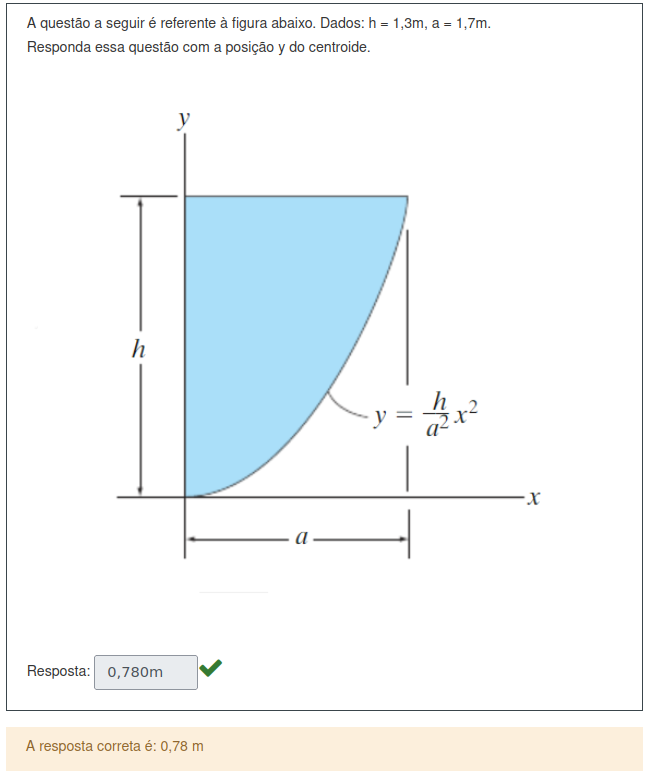

In [413]:
questao='1.4'
display(Math(r'\Large{'+questao+')}'))
Image(filename='../data/Q7/images/'+questao+'.png') 

In [414]:
%%write_and_run ../data/Q7/inputs/{questao}.py
h=1.3
a=1.7

#referencia


In [415]:
%%write_and_run ../data/Q7/resolutions/{questao}.py
ycm=3/5*h 
xcm=3/8*a
resposta(ycm,'m')


['%%write_and_run../data/Q7/resolutions/{questao}.py', 'ycm=3/5*h', 'xcm=3/8*a', "resposta(ycm,'m')", '']


/tmp/ipykernel_24261/1152134400.py:83: DeprecationWarning: `magic(...)` is deprecated since IPython 0.13 (warning added in 8.1), use run_line_magic(magic_name, parameter_s).
  ipy.magic("history {0}".format(ipy.execution_count - offset))


,0
ycm,0.78
xcm,0.64


A resposta final é:


0.780m

<IPython.core.display.Math object>

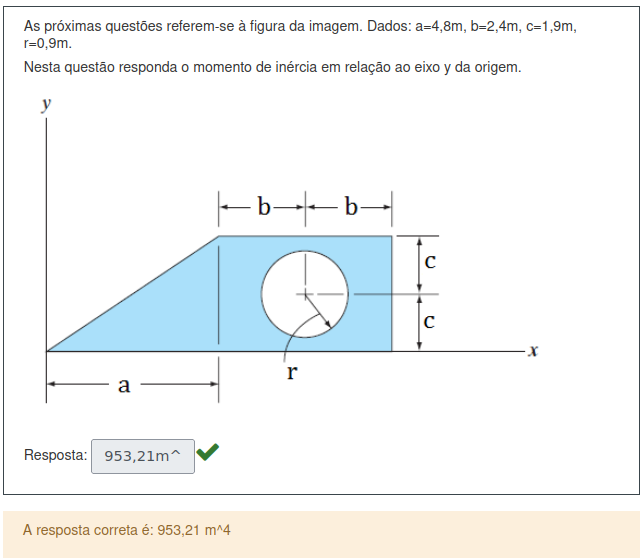

In [416]:
questao='1.5'
display(Math(r'\Large{'+questao+')}'))
Image(filename='../data/Q7/images/'+questao+'.png') 

In [417]:
%%write_and_run ../data/Q7/inputs/{questao}.py
a=4.8
b=2.4
c=1.9
r=0.9



#referencias
a=300
b=150
c=100
r=75


#Referencia




In [418]:
%%write_and_run ../data/Q7/resolutions/{questao}.py
h1=2*c
l1=a
dx=2/3*a
Iby1=l1**3*h1/36
A1=h1*l1/2
Iy1=Iby1+A1*dx**2
Iby2=np.pi*r**4/4 
A2=np.pi*r**2 
dx2=a+b
Iy2=Iby2+A2*dx2**2
l3=2*b 
h3=2*c
Iby3=l1**3*h1/12 
A3=l3*h3
dx3=a+b 
Iy3=Iby3+A3*dx3**2 
Iy=Iy1+Iy3-Iy2

x1cm=2/3*a 
y1cm=(2*c)/3
x2cm=a+b
y2cm=c 

xcm=(A1*x1cm+(A3-A2)*x2cm)/(A1+(A3-A2))
ycm=(A1*y1cm+(A3-A2)*y2cm)/(A1+(A3-A2))

resposta(Iy,'m^4') 



['%%write_and_run../data/Q7/resolutions/{questao}.py', 'h1=2*c', 'l1=a', 'dx=2/3*a', 'Iby1=l1**3*h1/36', 'A1=h1*l1/2', 'Iy1=Iby1+A1*dx**2', 'Iby2=np.pi*r**4/4', 'A2=np.pi*r**2', 'dx2=a+b', 'Iy2=Iby2+A2*dx2**2', 'l3=2*b', 'h3=2*c', 'Iby3=l1**3*h1/12', 'A3=l3*h3', 'dx3=a+b', 'Iy3=Iby3+A3*dx3**2', 'Iy=Iy1+Iy3-Iy2', '', 'x1cm=2/3*a', 'y1cm=(2*c)/3', 'x2cm=a+b', 'y2cm=c', '', 'xcm=(A1*x1cm+(A3-A2)*x2cm)/(A1+(A3-A2))', 'ycm=(A1*y1cm+(A3-A2)*y2cm)/(A1+(A3-A2))', '', "resposta(Iy,'m^4')", '']


/tmp/ipykernel_24261/1152134400.py:83: DeprecationWarning: `magic(...)` is deprecated since IPython 0.13 (warning added in 8.1), use run_line_magic(magic_name, parameter_s).
  ipy.magic("history {0}".format(ipy.execution_count - offset))


,0
h1,3.80
l1,4.80
dx,3.20
Iby1,11.67
A1,9.12
Iy1,105.06
Iby2,0.52
A2,2.54
dx2,7.20
Iy2,132.43


A resposta final é:


953.213m^4

<IPython.core.display.Math object>

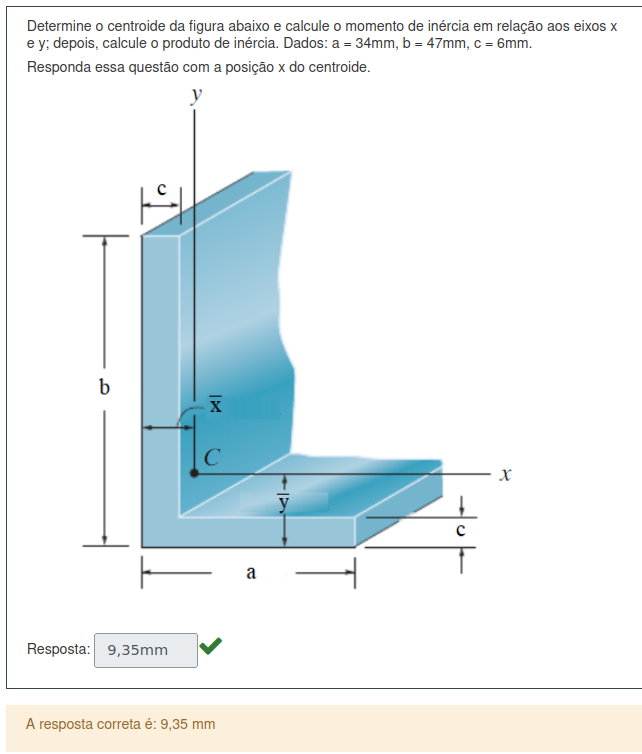

In [419]:
questao='1.6'
display(Math(r'\Large{'+questao+')}'))
Image(filename='../data/Q7/images/'+questao+'.png') 

In [420]:
%%write_and_run ../data/Q7/inputs/{questao}.py
a=34 
b=47 
c=6


In [421]:

#referencia
c=5
b=50
a=30


In [422]:
%%write_and_run ../data/Q7/resolutions/{questao}.py 
xcm1=c/2 
ycm1=(b+c)/2 
b1=c 
h1=b-c 
A1=b1*h1 

xcm2=a/2 
ycm2=c/2
b2=a 
h2=c 
A2=b2*h2

xcm=(A1*xcm1+A2*xcm2)/(A1+A2)
ycm=(A1*ycm1+A2*ycm2)/(A1+A2) 

##### 1

Ibx1=b1*h1**3/12
Iby1=b1**3*h1/12

dy1=-ycm+ycm1 
dx1=-xcm+xcm1

Ix1=Ibx1+A1*dy1**2 
Iy1=Iby1+A1*dx1**2 
Ixy1=A1*dx1*dy1

###### 2

Ibx2=b2*h2**3/12
Iby2=b2**3*h2/12

dx2=-xcm+xcm2 
dy2=-ycm+ycm2 

Iy2=Iby2+A2*dx2**2 
Ix2=Ibx2+A2*dy2**2 
Ixy2=A2*dx2*dy2

## ALL

Ix=Ix1+Ix2 
Iy=Iy1+Iy2 
Ixy=Ixy1+Ixy2


IxyMax=(Ix+Iy)/2+(((Ix-Iy)/2)**2+Ixy**2)**0.5
IxyMin=(Ix+Iy)/2-(((Ix-Iy)/2)**2+Ixy**2)**0.5
theta=sy.atan(2*Ixy/(Iy-Ix))/2
thetadeg=theta*180/np.pi
resposta(xcm,'mm')



['%%write_and_run../data/Q7/resolutions/{questao}.py', 'xcm1=c/2', 'ycm1=(b+c)/2', 'b1=c', 'h1=b-c', 'A1=b1*h1', '', 'xcm2=a/2', 'ycm2=c/2', 'b2=a', 'h2=c', 'A2=b2*h2', '', 'xcm=(A1*xcm1+A2*xcm2)/(A1+A2)', 'ycm=(A1*ycm1+A2*ycm2)/(A1+A2)', '', '#####1', '', 'Ibx1=b1*h1**3/12', 'Iby1=b1**3*h1/12', '', 'dy1=-ycm+ycm1', 'dx1=-xcm+xcm1', '', 'Ix1=Ibx1+A1*dy1**2', 'Iy1=Iby1+A1*dx1**2', 'Ixy1=A1*dx1*dy1', '', '######2', '', 'Ibx2=b2*h2**3/12', 'Iby2=b2**3*h2/12', '', 'dx2=-xcm+xcm2', 'dy2=-ycm+ycm2', '', 'Iy2=Iby2+A2*dx2**2', 'Ix2=Ibx2+A2*dy2**2', 'Ixy2=A2*dx2*dy2', '', '##ALL', '', 'Ix=Ix1+Ix2', 'Iy=Iy1+Iy2', 'Ixy=Ixy1+Ixy2', '', '', 'IxyMax=(Ix+Iy)/2+(((Ix-Iy)/2)**2+Ixy**2)**0.5', 'IxyMin=(Ix+Iy)/2-(((Ix-Iy)/2)**2+Ixy**2)**0.5', 'theta=sy.atan(2*Ixy/(Iy-Ix))/2', 'thetadeg=theta*180/np.pi', "resposta(xcm,'mm')", '']


/tmp/ipykernel_24261/1152134400.py:83: DeprecationWarning: `magic(...)` is deprecated since IPython 0.13 (warning added in 8.1), use run_line_magic(magic_name, parameter_s).
  ipy.magic("history {0}".format(ipy.execution_count - offset))


,0
xcm1,2.5
ycm1,27.5
b1,5
h1,45
A1,225
xcm2,15.0
ycm2,2.5
b2,30
h2,5
A2,150


A resposta final é:


7.500mm

<IPython.core.display.Math object>

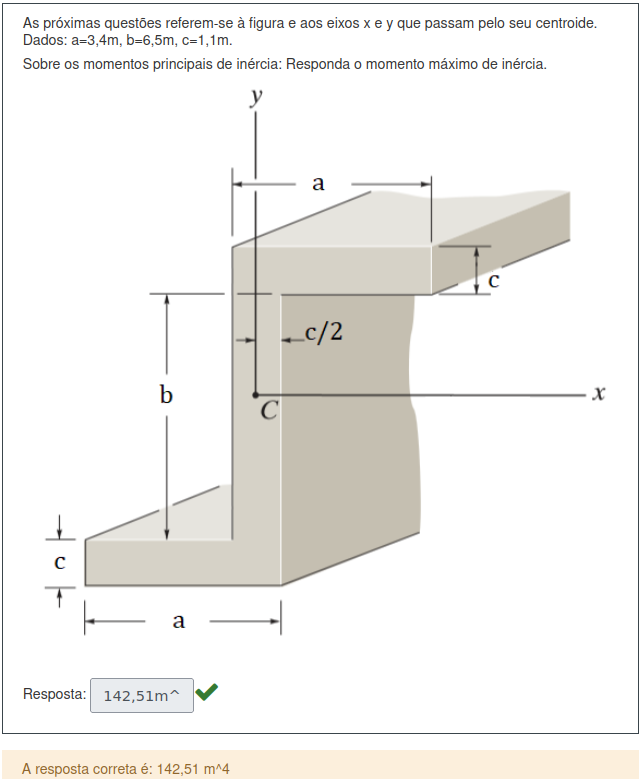

In [423]:
questao='1.7'
display(Math(r'\Large{'+questao+')}'))
Image(filename='../data/Q7/images/'+questao+'.png') 

In [424]:
%%write_and_run ../data/Q7/inputs/{questao}.py
a=3.4 
b=6.5 
c=1.1


#referencia
a=4
b=5
c=1

#referencia 2
a=400
b=400
c=100

In [425]:
%%write_and_run ../data/Q7/resolutions/{questao}.py

l1=a-c
h1=c
A1=l1*h1 
dx1=a/2
dy1=b/2+c/2
IAxy1=A1*dx1*dy1
Ibxy1=0
Ibx1=l1*h1**3/12
Iby1=l1**3*h1/12
IAx1=A1*dy1**2
IAy1=A1*dx1**2
Ix1=IAx1+Ibx1
Iy1=IAy1+Iby1
Ixy1=IAxy1+Ibxy1

l2=c
h2=b+2*c
A2=l2*h2
dx2=0
dy2=0 
IAxy2=0
Ibxy2=0
IAx2=A2*dy2**2
IAy2=A2*dx2**2
Ibx2=l2*h2**3/12
Iby2=l2**3*h2/12
Ix2=IAx2+Ibx2
Iy2=IAy2+Iby2
Ixy2=IAxy2+Ibxy2

l3=a-c
h3=c
A3=l3*h3
dx3=-a/2
dy3=-b/2-c/2
IAxy3=A3*dx3*dy3
Ibxy3=0
Ibx3=l3*h3**3/12
Iby3=l3**3*h3/12
IAx3=A3*dy3**2
IAy3=A3*dx3**2
Ix3=IAx3+Ibx3
Iy3=IAy3+Iby3
Ixy3=IAxy3+Ibxy3

Ix=Ix1+Ix2+Ix3 
Iy=Iy1+Iy2+Iy3 
Ixy=Ixy1+Ixy2+Ixy3

IxyMax=(Ix+Iy)/2+(((Ix-Iy)/2)**2+Ixy**2)**0.5
IxyMin=(Ix+Iy)/2-(((Ix-Iy)/2)**2+Ixy**2)**0.5
resposta(IxyMax,'m^4') 


['%%write_and_run../data/Q7/resolutions/{questao}.py', '', 'l1=a-c', 'h1=c', 'A1=l1*h1', 'dx1=a/2', 'dy1=b/2+c/2', 'IAxy1=A1*dx1*dy1', 'Ibxy1=0', 'Ibx1=l1*h1**3/12', 'Iby1=l1**3*h1/12', 'IAx1=A1*dy1**2', 'IAy1=A1*dx1**2', 'Ix1=IAx1+Ibx1', 'Iy1=IAy1+Iby1', 'Ixy1=IAxy1+Ibxy1', '', 'l2=c', 'h2=b+2*c', 'A2=l2*h2', 'dx2=0', 'dy2=0', 'IAxy2=0', 'Ibxy2=0', 'IAx2=A2*dy2**2', 'IAy2=A2*dx2**2', 'Ibx2=l2*h2**3/12', 'Iby2=l2**3*h2/12', 'Ix2=IAx2+Ibx2', 'Iy2=IAy2+Iby2', 'Ixy2=IAxy2+Ibxy2', '', 'l3=a-c', 'h3=c', 'A3=l3*h3', 'dx3=-a/2', 'dy3=-b/2-c/2', 'IAxy3=A3*dx3*dy3', 'Ibxy3=0', 'Ibx3=l3*h3**3/12', 'Iby3=l3**3*h3/12', 'IAx3=A3*dy3**2', 'IAy3=A3*dx3**2', 'Ix3=IAx3+Ibx3', 'Iy3=IAy3+Iby3', 'Ixy3=IAxy3+Ibxy3', '', 'Ix=Ix1+Ix2+Ix3', 'Iy=Iy1+Iy2+Iy3', 'Ixy=Ixy1+Ixy2+Ixy3', '', 'IxyMax=(Ix+Iy)/2+(((Ix-Iy)/2)**2+Ixy**2)**0.5', 'IxyMin=(Ix+Iy)/2-(((Ix-Iy)/2)**2+Ixy**2)**0.5', "resposta(IxyMax,'m^4')", '']


/tmp/ipykernel_24261/1152134400.py:83: DeprecationWarning: `magic(...)` is deprecated since IPython 0.13 (warning added in 8.1), use run_line_magic(magic_name, parameter_s).
  ipy.magic("history {0}".format(ipy.execution_count - offset))


,0
l1,2.30
h1,1.10
A1,2.53
dx1,1.70
dy1,3.80
IAxy1,16.34
Ibxy1,0.00
Ibx1,0.26
Iby1,1.12
IAx1,36.53


A resposta final é:


142.509m^4

<IPython.core.display.Math object>

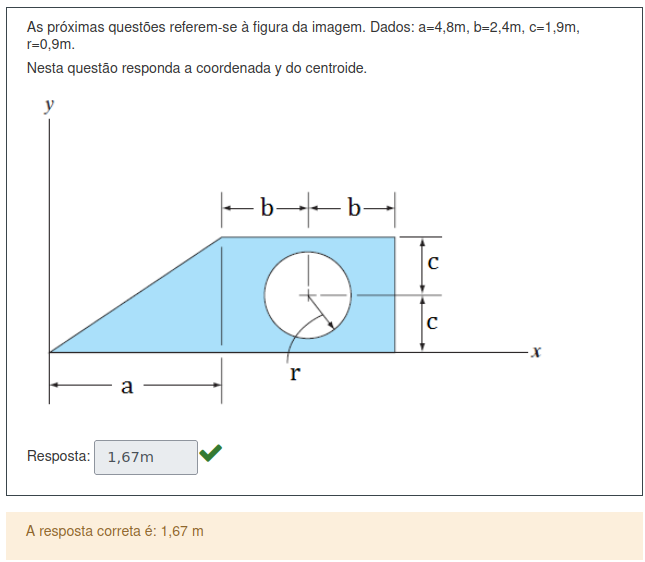

In [426]:
questao='1.8'
display(Math(r'\Large{'+questao+')}'))
Image(filename='../data/Q7/images/'+questao+'.png') 

In [427]:
%%write_and_run ../data/Q7/inputs/{questao}.py
a=4.8
b=2.4
c=1.9
r=0.9



#referencias
a=300
b=150
c=100
r=75

In [428]:
%%write_and_run ../data/Q7/resolutions/{questao}.py
h1=2*c
l1=a
dx=2/3*a
Iby1=l1**3*h1/36
A1=h1*l1/2
Iy1=Iby1+A1*dx**2
Iby2=np.pi*r**4/4 
A2=np.pi*r**2 
dx2=a+b
Iy2=Iby2+A2*dx2**2
l3=2*b 
h3=2*c
Iby3=l1**3*h1/12 
A3=l3*h3
dx3=a+b 
Iy3=Iby3+A3*dx3**2 
Iy=Iy1+Iy3-Iy2

x1cm=2/3*a 
y1cm=(2*c)/3
x2cm=a+b
y2cm=c 

xcm=(A1*x1cm+(A3-A2)*x2cm)/(A1+(A3-A2))
ycm=(A1*y1cm+(A3-A2)*y2cm)/(A1+(A3-A2))

resposta(ycm,'m') 



['%%write_and_run../data/Q7/resolutions/{questao}.py', 'h1=2*c', 'l1=a', 'dx=2/3*a', 'Iby1=l1**3*h1/36', 'A1=h1*l1/2', 'Iy1=Iby1+A1*dx**2', 'Iby2=np.pi*r**4/4', 'A2=np.pi*r**2', 'dx2=a+b', 'Iy2=Iby2+A2*dx2**2', 'l3=2*b', 'h3=2*c', 'Iby3=l1**3*h1/12', 'A3=l3*h3', 'dx3=a+b', 'Iy3=Iby3+A3*dx3**2', 'Iy=Iy1+Iy3-Iy2', '', 'x1cm=2/3*a', 'y1cm=(2*c)/3', 'x2cm=a+b', 'y2cm=c', '', 'xcm=(A1*x1cm+(A3-A2)*x2cm)/(A1+(A3-A2))', 'ycm=(A1*y1cm+(A3-A2)*y2cm)/(A1+(A3-A2))', '', "resposta(ycm,'m')", '']


/tmp/ipykernel_24261/1152134400.py:83: DeprecationWarning: `magic(...)` is deprecated since IPython 0.13 (warning added in 8.1), use run_line_magic(magic_name, parameter_s).
  ipy.magic("history {0}".format(ipy.execution_count - offset))


,0
h1,3.80
l1,4.80
dx,3.20
Iby1,11.67
A1,9.12
Iy1,105.06
Iby2,0.52
A2,2.54
dx2,7.20
Iy2,132.43


A resposta final é:


1.667m

<IPython.core.display.Math object>

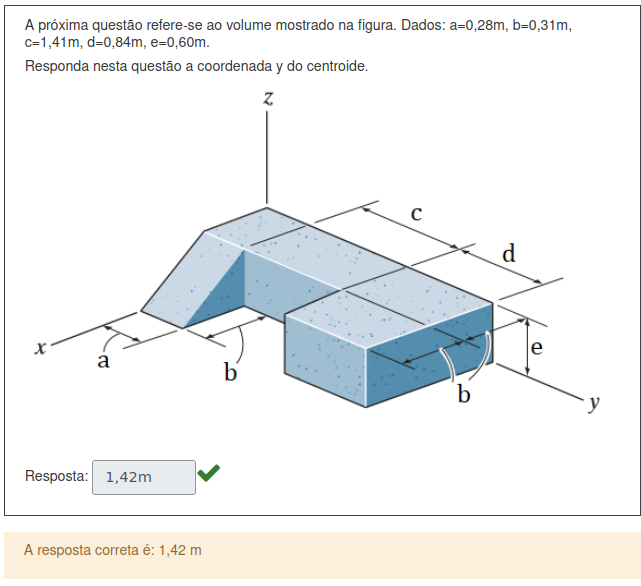

In [429]:
questao='1.9'
display(Math(r'\Large{'+questao+')}'))
Image(filename='../data/Q7/images/'+questao+'.png') 

In [430]:
%%write_and_run ../data/Q7/inputs/{questao}.py
a=0.28 
b=0.31 
c=1.41 
d=0.84 
e=0.60


#referencia
a=100
b=150
c=250
d=200
e=150


In [431]:
%%write_and_run ../data/Q7/resolutions/{questao}.py
xcm= 2*a*b**2*e/(3*(a*b*e/2 + b*d*e + b*e*(a + c + d))) + 3*b**2*d*e/(2*(a*b*e/2 + b*d*e + b*e*(a + c + d))) + b**2*e*(a + c + d)/(2*(a*b*e/2 + b*d*e + b*e*(a + c + d)))
ycm= a**2*b*e/(4*(a*b*e/2 + b*d*e + b*e*(a + c + d))) + b*d*e*(a + c + d/2)/(a*b*e/2 + b*d*e + b*e*(a + c + d)) + b*e*(a/2 + c/2 + d/2)*(a + c + d)/(a*b*e/2 + b*d*e + b*e*(a + c + d))
zcm= a*b*e**2/(6*(a*b*e/2 + b*d*e + b*e*(a + c + d))) + b*d*e**2/(2*(a*b*e/2 + b*d*e + b*e*(a + c + d))) + b*e**2*(a + c + d)/(2*(a*b*e/2 + b*d*e + b*e*(a + c + d)))
resposta(ycm,'m')


['%%write_and_run../data/Q7/resolutions/{questao}.py', 'xcm=2*a*b**2*e/(3*(a*b*e/2+b*d*e+b*e*(a+c+d)))+3*b**2*d*e/(2*(a*b*e/2+b*d*e+b*e*(a+c+d)))+b**2*e*(a+c+d)/(2*(a*b*e/2+b*d*e+b*e*(a+c+d)))', 'ycm=a**2*b*e/(4*(a*b*e/2+b*d*e+b*e*(a+c+d)))+b*d*e*(a+c+d/2)/(a*b*e/2+b*d*e+b*e*(a+c+d))+b*e*(a/2+c/2+d/2)*(a+c+d)/(a*b*e/2+b*d*e+b*e*(a+c+d))', 'zcm=a*b*e**2/(6*(a*b*e/2+b*d*e+b*e*(a+c+d)))+b*d*e**2/(2*(a*b*e/2+b*d*e+b*e*(a+c+d)))+b*e**2*(a+c+d)/(2*(a*b*e/2+b*d*e+b*e*(a+c+d)))', "resposta(ycm,'m')", '']


/tmp/ipykernel_24261/1152134400.py:83: DeprecationWarning: `magic(...)` is deprecated since IPython 0.13 (warning added in 8.1), use run_line_magic(magic_name, parameter_s).
  ipy.magic("history {0}".format(ipy.execution_count - offset))


,0
xcm,0.24
ycm,1.42
zcm,0.30


A resposta final é:


1.422m

<IPython.core.display.Math object>

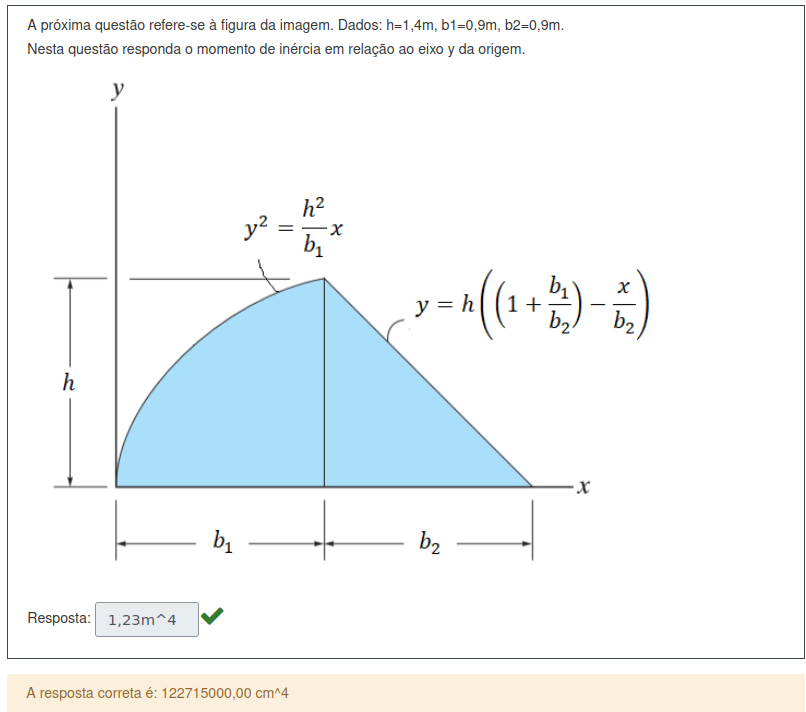

In [432]:
questao='1.10'
display(Math(r'\Large{'+questao+')}'))
Image(filename='../data/Q7/images/'+questao+'.png') 

In [433]:
%%write_and_run ../data/Q7/inputs/{questao}.py
h=1.4 
b1=0.9 
b2=0.9


#Referencia




In [434]:
%%write_and_run ../data/Q7/resolutions/{questao}.py
x = sy.symbols("x", real=True, positive=True) 
#h,b1,b2 = sy.symbols("h b1 b2", real=True, positive=True) 
y1=h/(b1**0.5)*x**0.5 
Iy1=sy.integrate(x**2*y1,(x,0,b1)) 
y2=h*((1+b1/b2)-x/b2) 
Iy2=sy.simplify(sy.integrate(x**2*y2,(x,b1,b1+b2)))
Iy=Iy1+Iy2
resposta(Iy,'m^4')



['%%write_and_run../data/Q7/resolutions/{questao}.py', 'x=sy.symbols("x",real=True,positive=True)', '#h,b1,b2=sy.symbols("hb1b2",real=True,positive=True)', 'y1=h/(b1**0.5)*x**0.5', 'Iy1=sy.integrate(x**2*y1,(x,0,b1))', 'y2=h*((1+b1/b2)-x/b2)', 'Iy2=sy.simplify(sy.integrate(x**2*y2,(x,b1,b1+b2)))', 'Iy=Iy1+Iy2', "resposta(Iy,'m^4')", '']


/tmp/ipykernel_24261/1152134400.py:83: DeprecationWarning: `magic(...)` is deprecated since IPython 0.13 (warning added in 8.1), use run_line_magic(magic_name, parameter_s).
  ipy.magic("history {0}".format(ipy.execution_count - offset))


,0
x,x
y1,1.47572957474524*x**0.5
Iy1,0.291600000000000
y2,2.8 - 1.55555555555556*x
Iy2,0.935550000000000
Iy,1.22715000000000


A resposta final é:


1.227m^4

<IPython.core.display.Math object>

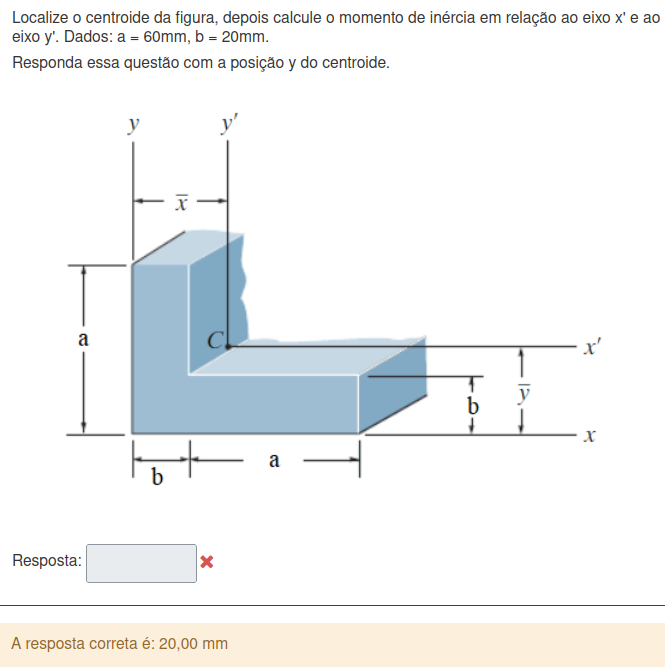

In [435]:
questao='2.1'
display(Math(r'\Large{'+questao+')}'))
Image(filename='../data/Q7/images/'+questao+'.png') 

In [436]:
%%write_and_run ../data/Q7/inputs/{questao}.py
a=60
b=20 


In [437]:
%%write_and_run ../data/Q7/resolutions/{questao}.py 
xcm1= b / 2
ycm1= (a + b) / 2
b1=b
h1= a - b
A1=b1*h1

xcm2= (a+b) / 2
ycm2= b / 2
b2=(a+b)
h2=b
A2=b2*h2

xcm=(A1*xcm1+A2*xcm2)/(A1+A2)
ycm=(A1*ycm1+A2*ycm2)/(A1+A2)

##### 1

Ibx1=b1*h1**3/12
Iby1=b1**3*h1/12

dy1=-ycm+ycm1
dx1=-xcm+xcm1

Ix1=Ibx1+A1*dy1**2
Iy1=Iby1+A1*dx1**2
Ixy1=A1*dx1*dy1

###### 2

Ibx2=b2*h2**3/12
Iby2=b2**3*h2/12

dx2=-xcm+xcm2
dy2=-ycm+ycm2

Iy2=Iby2+A2*dx2**2
Ix2=Ibx2+A2*dy2**2
Ixy2=A2*dx2*dy2

## ALL

Ix=Ix1+Ix2
Iy=Iy1+Iy2
Ixy=Ixy1+Ixy2


IxyMax=(Ix+Iy)/2+(((Ix-Iy)/2)**2+Ixy**2)**0.5
IxyMin=(Ix+Iy)/2-(((Ix-Iy)/2)**2+Ixy**2)**0.5
theta=sy.atan(2*Ixy/(Iy-Ix))/2
thetadeg=theta*180/np.pi
resposta(xcm,'mm')

['%%write_and_run../data/Q7/resolutions/{questao}.py', 'xcm1=b/2', 'ycm1=(a+b)/2', 'b1=b', 'h1=a-b', 'A1=b1*h1', '', 'xcm2=(a+b)/2', 'ycm2=b/2', 'b2=(a+b)', 'h2=b', 'A2=b2*h2', '', 'xcm=(A1*xcm1+A2*xcm2)/(A1+A2)', 'ycm=(A1*ycm1+A2*ycm2)/(A1+A2)', '', '#####1', '', 'Ibx1=b1*h1**3/12', 'Iby1=b1**3*h1/12', '', 'dy1=-ycm+ycm1', 'dx1=-xcm+xcm1', '', 'Ix1=Ibx1+A1*dy1**2', 'Iy1=Iby1+A1*dx1**2', 'Ixy1=A1*dx1*dy1', '', '######2', '', 'Ibx2=b2*h2**3/12', 'Iby2=b2**3*h2/12', '', 'dx2=-xcm+xcm2', 'dy2=-ycm+ycm2', '', 'Iy2=Iby2+A2*dx2**2', 'Ix2=Ibx2+A2*dy2**2', 'Ixy2=A2*dx2*dy2', '', '##ALL', '', 'Ix=Ix1+Ix2', 'Iy=Iy1+Iy2', 'Ixy=Ixy1+Ixy2', '', '', 'IxyMax=(Ix+Iy)/2+(((Ix-Iy)/2)**2+Ixy**2)**0.5', 'IxyMin=(Ix+Iy)/2-(((Ix-Iy)/2)**2+Ixy**2)**0.5', 'theta=sy.atan(2*Ixy/(Iy-Ix))/2', 'thetadeg=theta*180/np.pi', "resposta(xcm,'mm')", '']


/tmp/ipykernel_24261/1152134400.py:83: DeprecationWarning: `magic(...)` is deprecated since IPython 0.13 (warning added in 8.1), use run_line_magic(magic_name, parameter_s).
  ipy.magic("history {0}".format(ipy.execution_count - offset))


,0
xcm1,10.0
ycm1,40.0
b1,20
h1,40
A1,800
xcm2,40.0
ycm2,10.0
b2,80
h2,20
A2,1600


A resposta final é:


30.000mm


#Referencia




<IPython.core.display.Math object>

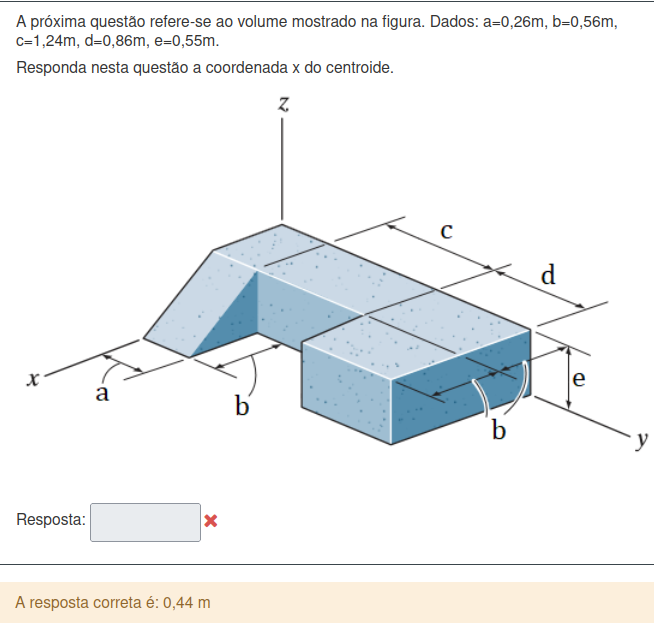

In [438]:
questao='2.2'
display(Math(r'\Large{'+questao+')}'))
Image(filename='../data/Q7/images/'+questao+'.png') 

In [439]:
%%write_and_run ../data/Q7/inputs/{questao}.py
a=0.26 
b=0.56 
c=1.24 
d=0.86 
e=0.55


#referencia
a=100
b=150
c=250
d=200
e=150


In [440]:
%%write_and_run ../data/Q7/resolutions/{questao}.py
xcm= 2*a*b**2*e/(3*(a*b*e/2 + b*d*e + b*e*(a + c + d))) + 3*b**2*d*e/(2*(a*b*e/2 + b*d*e + b*e*(a + c + d))) + b**2*e*(a + c + d)/(2*(a*b*e/2 + b*d*e + b*e*(a + c + d)))
ycm= a**2*b*e/(4*(a*b*e/2 + b*d*e + b*e*(a + c + d))) + b*d*e*(a + c + d/2)/(a*b*e/2 + b*d*e + b*e*(a + c + d)) + b*e*(a/2 + c/2 + d/2)*(a + c + d)/(a*b*e/2 + b*d*e + b*e*(a + c + d))
zcm= a*b*e**2/(6*(a*b*e/2 + b*d*e + b*e*(a + c + d))) + b*d*e**2/(2*(a*b*e/2 + b*d*e + b*e*(a + c + d))) + b*e**2*(a + c + d)/(2*(a*b*e/2 + b*d*e + b*e*(a + c + d)))
resposta(xcm,'m')


['%%write_and_run../data/Q7/resolutions/{questao}.py', 'xcm=2*a*b**2*e/(3*(a*b*e/2+b*d*e+b*e*(a+c+d)))+3*b**2*d*e/(2*(a*b*e/2+b*d*e+b*e*(a+c+d)))+b**2*e*(a+c+d)/(2*(a*b*e/2+b*d*e+b*e*(a+c+d)))', 'ycm=a**2*b*e/(4*(a*b*e/2+b*d*e+b*e*(a+c+d)))+b*d*e*(a+c+d/2)/(a*b*e/2+b*d*e+b*e*(a+c+d))+b*e*(a/2+c/2+d/2)*(a+c+d)/(a*b*e/2+b*d*e+b*e*(a+c+d))', 'zcm=a*b*e**2/(6*(a*b*e/2+b*d*e+b*e*(a+c+d)))+b*d*e**2/(2*(a*b*e/2+b*d*e+b*e*(a+c+d)))+b*e**2*(a+c+d)/(2*(a*b*e/2+b*d*e+b*e*(a+c+d)))', "resposta(xcm,'m')", '']


/tmp/ipykernel_24261/1152134400.py:83: DeprecationWarning: `magic(...)` is deprecated since IPython 0.13 (warning added in 8.1), use run_line_magic(magic_name, parameter_s).
  ipy.magic("history {0}".format(ipy.execution_count - offset))


,0
xcm,0.44
ycm,1.33
zcm,0.27


A resposta final é:


0.442m

<IPython.core.display.Math object>

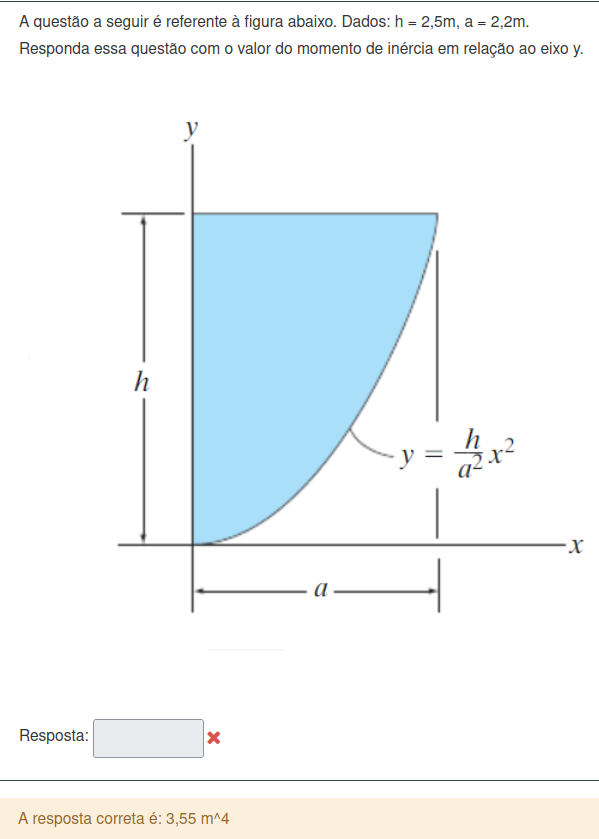

In [441]:
questao='2.3'
display(Math(r'\Large{'+questao+')}'))
Image(filename='../data/Q7/images/'+questao+'.png') 

In [442]:
%%write_and_run ../data/Q7/inputs/{questao}.py
h=2.5
a=2.2

#referencia


In [443]:
%%write_and_run ../data/Q7/resolutions/{questao}.py
#h,a=sy.symbols('h a',real=True,positive=True)
x=sy.symbols('x',real=True,positive=True)
y=h*x**2/a**2
Iy=sy.simplify(sy.integrate(x**2*(h-y),(x,0,a)))

y=sy.symbols('y',real=True,positive=True)
x=sy.sqrt((y*a**2/h))
Ix=sy.simplify(sy.integrate(y**2*x,(y,0,h)))
resposta(Iy,'m^4')


/tmp/ipykernel_24261/1152134400.py:83: DeprecationWarning: `magic(...)` is deprecated since IPython 0.13 (warning added in 8.1), use run_line_magic(magic_name, parameter_s).
  ipy.magic("history {0}".format(ipy.execution_count - offset))


['%%write_and_run../data/Q7/resolutions/{questao}.py', "#h,a=sy.symbols('ha',real=True,positive=True)", "x=sy.symbols('x',real=True,positive=True)", 'y=h*x**2/a**2', 'Iy=sy.simplify(sy.integrate(x**2*(h-y),(x,0,a)))', '', "y=sy.symbols('y',real=True,positive=True)", 'x=sy.sqrt((y*a**2/h))', 'Ix=sy.simplify(sy.integrate(y**2*x,(y,0,h)))', "resposta(Iy,'m^4')", '']


,0
x,1.39140217047409*sqrt(y)
y,y
Iy,3.54933333333334
Ix,9.82142857142857


A resposta final é:


3.549m^4

<IPython.core.display.Math object>

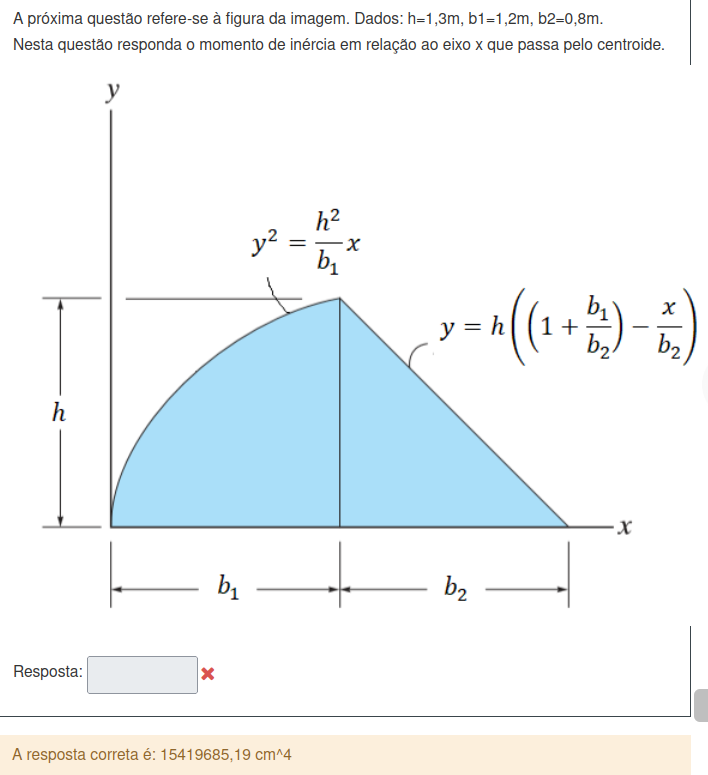

In [444]:
questao='2.4'
display(Math(r'\Large{'+questao+')}'))
Image(filename='../data/Q7/images/'+questao+'.png') 

In [445]:
%%write_and_run ../data/Q7/inputs/{questao}.py
h=1.3
b1=1.2
b2=0.8

In [446]:
%%write_and_run ../data/Q7/resolutions/{questao}.py
#center of mass
#b1,b2,h,x,y=sy.symbols('b1 b2 h x y')
y=sy.symbols('y')
x1=b1*y**2/h**2
x2=(-y/h+(1+b1/b2))*b2
V=sy.integrate((x2-x1),(y,0,h))
ycminf=y
xcminf=(x2+x1)/2
ycm=sy.integrate(ycminf*(x2-x1),(y,0,h))/V
xcm=sy.integrate(xcminf*(x2-x1),(y,0,h))/V
#momento de inercia Ix que passa pelo cm
Ix=sy.integrate((y-ycm)**2*(x2-x1),(y,0,h))
resposta(Ix,'m^4')

['%%write_and_run../data/Q7/resolutions/{questao}.py', '#centerofmass', "#b1,b2,h,x,y=sy.symbols('b1b2hxy')", "y=sy.symbols('y')", 'x1=b1*y**2/h**2', 'x2=(-y/h+(1+b1/b2))*b2', 'V=sy.integrate((x2-x1),(y,0,h))', 'ycminf=y', 'xcminf=(x2+x1)/2', 'ycm=sy.integrate(ycminf*(x2-x1),(y,0,h))/V', 'xcm=sy.integrate(xcminf*(x2-x1),(y,0,h))/V', '#momentodeinerciaIxquepassapelocm', 'Ix=sy.integrate((y-ycm)**2*(x2-x1),(y,0,h))', "resposta(Ix,'m^4')", '']


/tmp/ipykernel_24261/1152134400.py:83: DeprecationWarning: `magic(...)` is deprecated since IPython 0.13 (warning added in 8.1), use run_line_magic(magic_name, parameter_s).
  ipy.magic("history {0}".format(ipy.execution_count - offset))


,0
y,y
x1,0.710059171597633*y**2
x2,2.0 - 0.615384615384615*y
V,1.56000000000000
ycminf,y
xcminf,0.355029585798816*y**2 - 0.307692307692308*y +...
ycm,0.469444444444445
xcm,0.968888888888889
Ix,0.154196851851851


A resposta final é:


0.154m^4

In [447]:
Ix*(100)**4

15419685.1851851

<IPython.core.display.Math object>

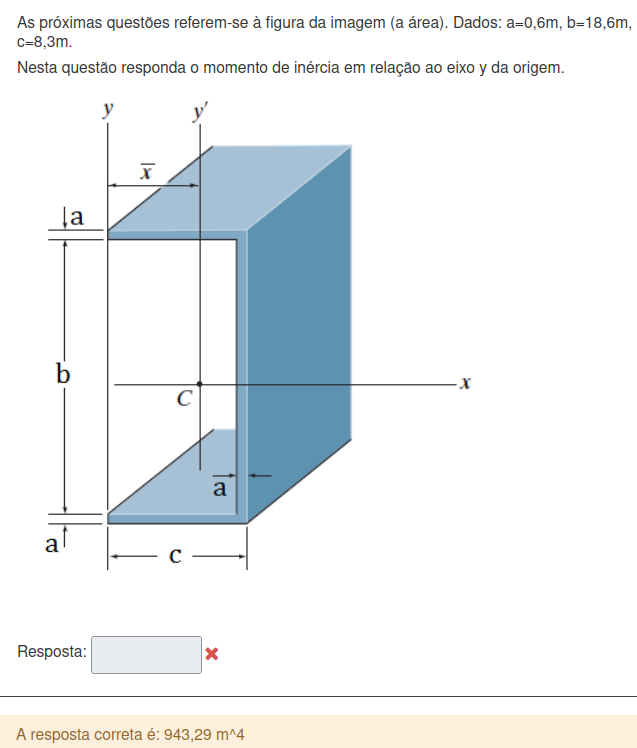

In [448]:
questao='2.5'
display(Math(r'\Large{'+questao+')}'))
Image(filename='../data/Q7/images/'+questao+'.png') 

In [449]:
%%write_and_run ../data/Q7/inputs/{questao}.py
a=0.6
b=18.6
c=8.3

In [450]:
%%write_and_run ../data/Q7/resolutions/{questao}.py
xcm=[c/2,c-a/2,c/2]
ycm=[a/2,a+b/2,a+b+a/2]
h=[a,b,a]
l=[c,a,c]
dx=xcm
dy=np.array(ycm)-(a+b/2)
Iy=[None]*3
Ix=[None]*3
for i in range(3):
    Ix[i]=l[i]*h[i]**3/12+h[i]*l[i]*dy[i]**2
    Iy[i]=l[i]**3*h[i]/12+h[i]*l[i]*dx[i]**2
Iy_tot=sum(Iy)
Ix_tot=sum(Ix)
resposta(Iy_tot,'m^4')

['%%write_and_run../data/Q7/resolutions/{questao}.py', 'xcm=[c/2,c-a/2,c/2]', 'ycm=[a/2,a+b/2,a+b+a/2]', 'h=[a,b,a]', 'l=[c,a,c]', 'dx=xcm', 'dy=np.array(ycm)-(a+b/2)', 'Iy=[None]*3', 'Ix=[None]*3', 'foriinrange(3):', 'Ix[i]=l[i]*h[i]**3/12+h[i]*l[i]*dy[i]**2', 'Iy[i]=l[i]**3*h[i]/12+h[i]*l[i]*dx[i]**2', 'Iy_tot=sum(Iy)', 'Ix_tot=sum(Ix)', "resposta(Iy_tot,'m^4')", '']


/tmp/ipykernel_24261/1152134400.py:83: DeprecationWarning: `magic(...)` is deprecated since IPython 0.13 (warning added in 8.1), use run_line_magic(magic_name, parameter_s).
  ipy.magic("history {0}".format(ipy.execution_count - offset))


,0
xcm,"[4.15, 8.0, 4.15]"
ycm,"[0.3, 9.9, 19.500000000000004]"
h,"[0.6, 18.6, 0.6]"
l,"[8.3, 0.6, 8.3]"
dx,"[4.15, 8.0, 4.15]"
dy,"[-9.6, 0.0, 9.600000000000003]"
Iy,"[114.35740000000004, 714.5748, 114.35740000000..."
Ix,"[459.10620000000006, 321.74280000000005, 459.1..."
Iy_tot,943.29
Ix_tot,1239.96


A resposta final é:


943.290m^4

<IPython.core.display.Math object>

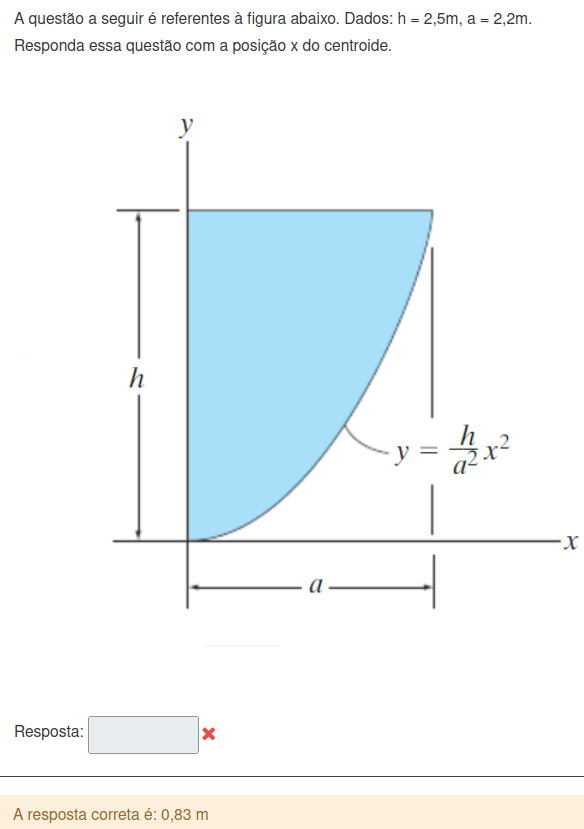

In [451]:
questao='2.6'
display(Math(r'\Large{'+questao+')}'))
Image(filename='../data/Q7/images/'+questao+'.png') 

In [452]:
%%write_and_run ../data/Q7/inputs/{questao}.py
h=2.5
a=2.2

In [453]:
%%write_and_run ../data/Q7/resolutions/{questao}.py
ycm=3/5*h 
xcm=3/8*a
resposta(xcm,'m')


['%%write_and_run../data/Q7/resolutions/{questao}.py', 'ycm=3/5*h', 'xcm=3/8*a', "resposta(xcm,'m')", '']


/tmp/ipykernel_24261/1152134400.py:83: DeprecationWarning: `magic(...)` is deprecated since IPython 0.13 (warning added in 8.1), use run_line_magic(magic_name, parameter_s).
  ipy.magic("history {0}".format(ipy.execution_count - offset))


,0
ycm,1.50
xcm,0.82


A resposta final é:


0.825m

<IPython.core.display.Math object>

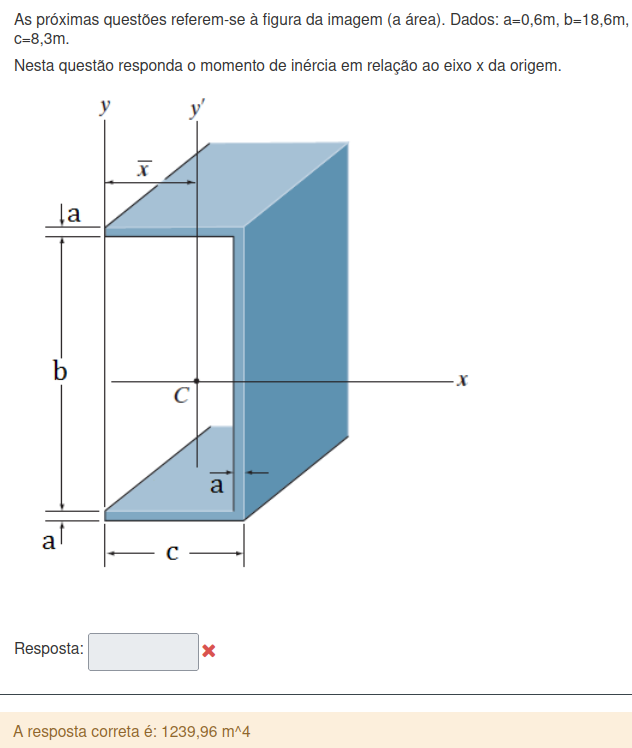

In [454]:
questao='2.7'
display(Math(r'\Large{'+questao+')}'))
Image(filename='../data/Q7/images/'+questao+'.png') 

In [455]:
%%write_and_run ../data/Q7/inputs/{questao}.py
a=0.6
b=18.6
c=8.3

In [456]:
%%write_and_run ../data/Q7/resolutions/{questao}.py
xcm=[c/2,c-a/2,c/2]
ycm=[a/2,a+b/2,a+b+a/2]
h=[a,b,a]
l=[c,a,c]
dx=xcm
dy=np.array(ycm)-(a+b/2)
Iy=[None]*3
Ix=[None]*3
for i in range(3):
    Ix[i]=l[i]*h[i]**3/12+h[i]*l[i]*dy[i]**2
    Iy[i]=l[i]**3*h[i]/12+h[i]*l[i]*dx[i]**2
Iy_tot=sum(Iy)
Ix_tot=sum(Ix)
resposta(Ix_tot,'m^4')

['%%write_and_run../data/Q7/resolutions/{questao}.py', 'xcm=[c/2,c-a/2,c/2]', 'ycm=[a/2,a+b/2,a+b+a/2]', 'h=[a,b,a]', 'l=[c,a,c]', 'dx=xcm', 'dy=np.array(ycm)-(a+b/2)', 'Iy=[None]*3', 'Ix=[None]*3', 'foriinrange(3):', 'Ix[i]=l[i]*h[i]**3/12+h[i]*l[i]*dy[i]**2', 'Iy[i]=l[i]**3*h[i]/12+h[i]*l[i]*dx[i]**2', 'Iy_tot=sum(Iy)', 'Ix_tot=sum(Ix)', "resposta(Ix_tot,'m^4')", '']


/tmp/ipykernel_24261/1152134400.py:83: DeprecationWarning: `magic(...)` is deprecated since IPython 0.13 (warning added in 8.1), use run_line_magic(magic_name, parameter_s).
  ipy.magic("history {0}".format(ipy.execution_count - offset))


,0
xcm,"[4.15, 8.0, 4.15]"
ycm,"[0.3, 9.9, 19.500000000000004]"
h,"[0.6, 18.6, 0.6]"
l,"[8.3, 0.6, 8.3]"
dx,"[4.15, 8.0, 4.15]"
dy,"[-9.6, 0.0, 9.600000000000003]"
Iy,"[114.35740000000004, 714.5748, 114.35740000000..."
Ix,"[459.10620000000006, 321.74280000000005, 459.1..."
Iy_tot,943.29
Ix_tot,1239.96


A resposta final é:


1239.955m^4

<IPython.core.display.Math object>

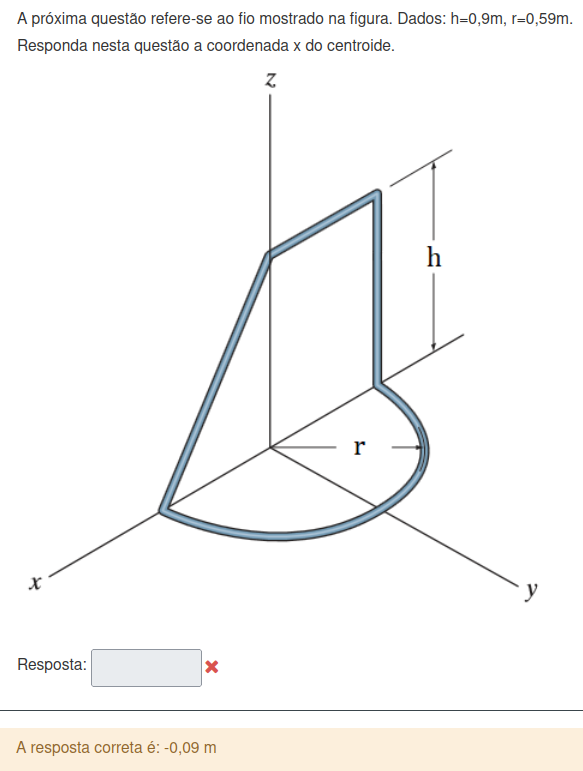

In [457]:
questao='2.8'
display(Math(r'\Large{'+questao+')}'))
Image(filename='../data/Q7/images/'+questao+'.png') 

In [458]:
%%write_and_run ../data/Q7/inputs/{questao}.py
h=0.9
r=0.59

In [459]:
%%write_and_run ../data/Q7/resolutions/{questao}.py
c=[np.pi*r,h,r,(r**2+h**2)**0.5]
ctot=sum(c)
dx=[0,-r,-r/2,r/2]
dy=[8/np.pi,0,0,0]
dz=[0,h/2,h,h/2]


xcm=0
ycm=0
zcm=0
for i in range(4):
    xcm+=c[i]*dx[i]/ctot
    ycm+=c[i]*dy[i]/ctot
    zcm+=c[i]*dz[i]/ctot

resposta(xcm,'m')

['%%write_and_run../data/Q7/resolutions/{questao}.py', 'c=[np.pi*r,h,r,(r**2+h**2)**0.5]', 'ctot=sum(c)', 'dx=[0,-r,-r/2,r/2]', 'dy=[8/np.pi,0,0,0]', 'dz=[0,h/2,h,h/2]', '', '', 'xcm=0', 'ycm=0', 'zcm=0', 'foriinrange(4):', 'xcm+=c[i]*dx[i]/ctot', 'ycm+=c[i]*dy[i]/ctot', 'zcm+=c[i]*dz[i]/ctot', '', "resposta(xcm,'m')", '']


/tmp/ipykernel_24261/1152134400.py:83: DeprecationWarning: `magic(...)` is deprecated since IPython 0.13 (warning added in 8.1), use run_line_magic(magic_name, parameter_s).
  ipy.magic("history {0}".format(ipy.execution_count - offset))


,0
c,"[1.853539665617978, 0.9, 0.59, 1.0761505470890..."
ctot,4.42
dx,"[0, -0.59, -0.295, 0.295]"
dy,"[2.5464790894703255, 0, 0, 0]"
dz,"[0, 0.45, 0.9, 0.45]"
xcm,-0.09
ycm,1.07
zcm,0.32


A resposta final é:


-0.088m

<IPython.core.display.Math object>

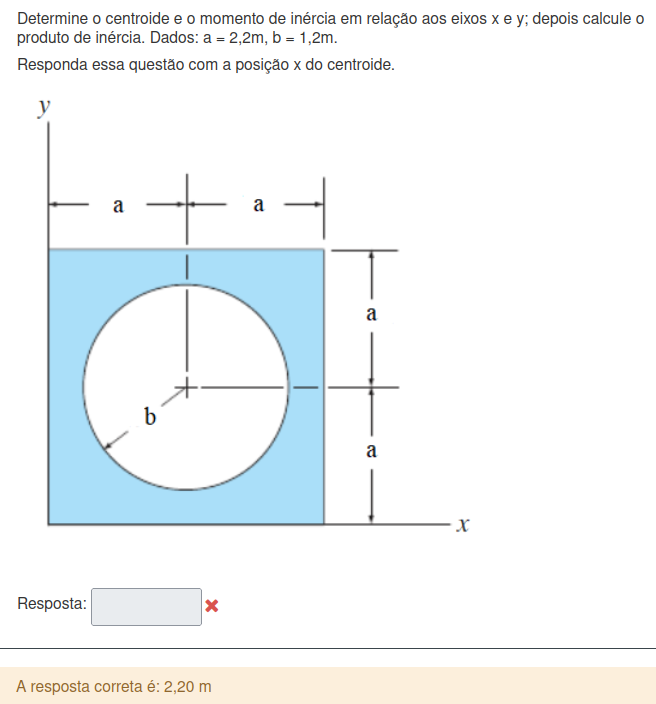

In [460]:
questao='2.9'
display(Math(r'\Large{'+questao+')}'))
Image(filename='../data/Q7/images/'+questao+'.png') 

In [461]:
%%write_and_run ../data/Q7/inputs/{questao}.py
a=2.2
b=1.2

In [462]:
%%write_and_run ../data/Q7/resolutions/{questao}.py
xcm=a
ycm=a
Ixq=(2*a)**4/12+(2*a)**2*a
Ixc=np.pi*b**4/4+np.pi*b**2*a 
Ix=Ixq-Ixc
Iy=Ix

resposta(xcm,'m')

['%%write_and_run../data/Q7/resolutions/{questao}.py', 'xcm=a', 'ycm=a', 'Ixq=(2*a)**4/12+(2*a)**2*a', 'Ixc=np.pi*b**4/4+np.pi*b**2*a', 'Ix=Ixq-Ixc', 'Iy=Ix', '', "resposta(xcm,'m')", '']


/tmp/ipykernel_24261/1152134400.py:83: DeprecationWarning: `magic(...)` is deprecated since IPython 0.13 (warning added in 8.1), use run_line_magic(magic_name, parameter_s).
  ipy.magic("history {0}".format(ipy.execution_count - offset))


,0
xcm,2.20
ycm,2.20
Ixq,73.83
Ixc,11.58
Ix,62.24
Iy,62.24


A resposta final é:


2.200m

<IPython.core.display.Math object>

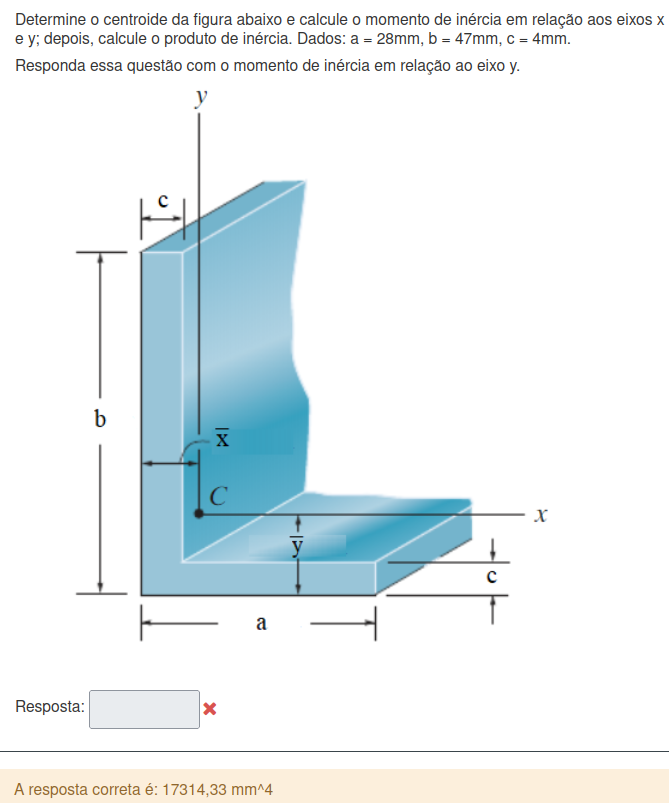

In [463]:
questao='2.10'
display(Math(r'\Large{'+questao+')}'))
Image(filename='../data/Q7/images/'+questao+'.png') 

In [464]:
%%write_and_run ../data/Q7/inputs/{questao}.py
a=28
b=47
c=4

In [465]:
%%write_and_run ../data/Q7/resolutions/{questao}.py
xcm1=c/2 
ycm1=(b+c)/2 
b1=c 
h1=b-c 
A1=b1*h1 

xcm2=a/2 
ycm2=c/2
b2=a 
h2=c 
A2=b2*h2

xcm=(A1*xcm1+A2*xcm2)/(A1+A2)
ycm=(A1*ycm1+A2*ycm2)/(A1+A2) 

##### 1

Ibx1=b1*h1**3/12
Iby1=b1**3*h1/12

dy1=-ycm+ycm1 
dx1=-xcm+xcm1

Ix1=Ibx1+A1*dy1**2 
Iy1=Iby1+A1*dx1**2 
Ixy1=A1*dx1*dy1

###### 2

Ibx2=b2*h2**3/12
Iby2=b2**3*h2/12

dx2=-xcm+xcm2 
dy2=-ycm+ycm2 

Iy2=Iby2+A2*dx2**2 
Ix2=Ibx2+A2*dy2**2 
Ixy2=A2*dx2*dy2

## ALL

Ix=Ix1+Ix2 
Iy=Iy1+Iy2 
Ixy=Ixy1+Ixy2


IxyMax=(Ix+Iy)/2+(((Ix-Iy)/2)**2+Ixy**2)**0.5
IxyMin=(Ix+Iy)/2-(((Ix-Iy)/2)**2+Ixy**2)**0.5
theta=sy.atan(2*Ixy/(Iy-Ix))/2
thetadeg=theta*180/np.pi
resposta(Iy,'mm^4')

['%%write_and_run../data/Q7/resolutions/{questao}.py', 'xcm1=c/2', 'ycm1=(b+c)/2', 'b1=c', 'h1=b-c', 'A1=b1*h1', '', 'xcm2=a/2', 'ycm2=c/2', 'b2=a', 'h2=c', 'A2=b2*h2', '', 'xcm=(A1*xcm1+A2*xcm2)/(A1+A2)', 'ycm=(A1*ycm1+A2*ycm2)/(A1+A2)', '', '#####1', '', 'Ibx1=b1*h1**3/12', 'Iby1=b1**3*h1/12', '', 'dy1=-ycm+ycm1', 'dx1=-xcm+xcm1', '', 'Ix1=Ibx1+A1*dy1**2', 'Iy1=Iby1+A1*dx1**2', 'Ixy1=A1*dx1*dy1', '', '######2', '', 'Ibx2=b2*h2**3/12', 'Iby2=b2**3*h2/12', '', 'dx2=-xcm+xcm2', 'dy2=-ycm+ycm2', '', 'Iy2=Iby2+A2*dx2**2', 'Ix2=Ibx2+A2*dy2**2', 'Ixy2=A2*dx2*dy2', '', '##ALL', '', 'Ix=Ix1+Ix2', 'Iy=Iy1+Iy2', 'Ixy=Ixy1+Ixy2', '', '', 'IxyMax=(Ix+Iy)/2+(((Ix-Iy)/2)**2+Ixy**2)**0.5', 'IxyMin=(Ix+Iy)/2-(((Ix-Iy)/2)**2+Ixy**2)**0.5', 'theta=sy.atan(2*Ixy/(Iy-Ix))/2', 'thetadeg=theta*180/np.pi', "resposta(Iy,'mm^4')", '']


/tmp/ipykernel_24261/1152134400.py:83: DeprecationWarning: `magic(...)` is deprecated since IPython 0.13 (warning added in 8.1), use run_line_magic(magic_name, parameter_s).
  ipy.magic("history {0}".format(ipy.execution_count - offset))


,0
xcm1,2.0
ycm1,25.5
b1,4
h1,43
A1,172
xcm2,14.0
ycm2,2.0
b2,28
h2,4
A2,112


A resposta final é:


17314.329mm^4